# CASE PREVISÃO DE VENDAS

## Análise Exploratória

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
df_original = pd.read_csv("online_shoppers_intention.csv")

df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Shape dos dados

(Registro, variável)

In [3]:
df_original.shape

(12330, 18)

Visualização dos tipos de dados

In [4]:
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Valores únicos (Categóricos e contínuos)

In [5]:
df_original.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [6]:
df_original.dropna(inplace=True)

In [7]:
df_original.shape

(12316, 18)

In [8]:
df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [9]:
df = df_original.copy()

continuous = []
categorical = []

for c in df.columns[:-1]:
    if df.nunique()[c] >=30:
        continuous.append(c)
    else: 
        categorical.append(c)

In [10]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [11]:
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [12]:
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


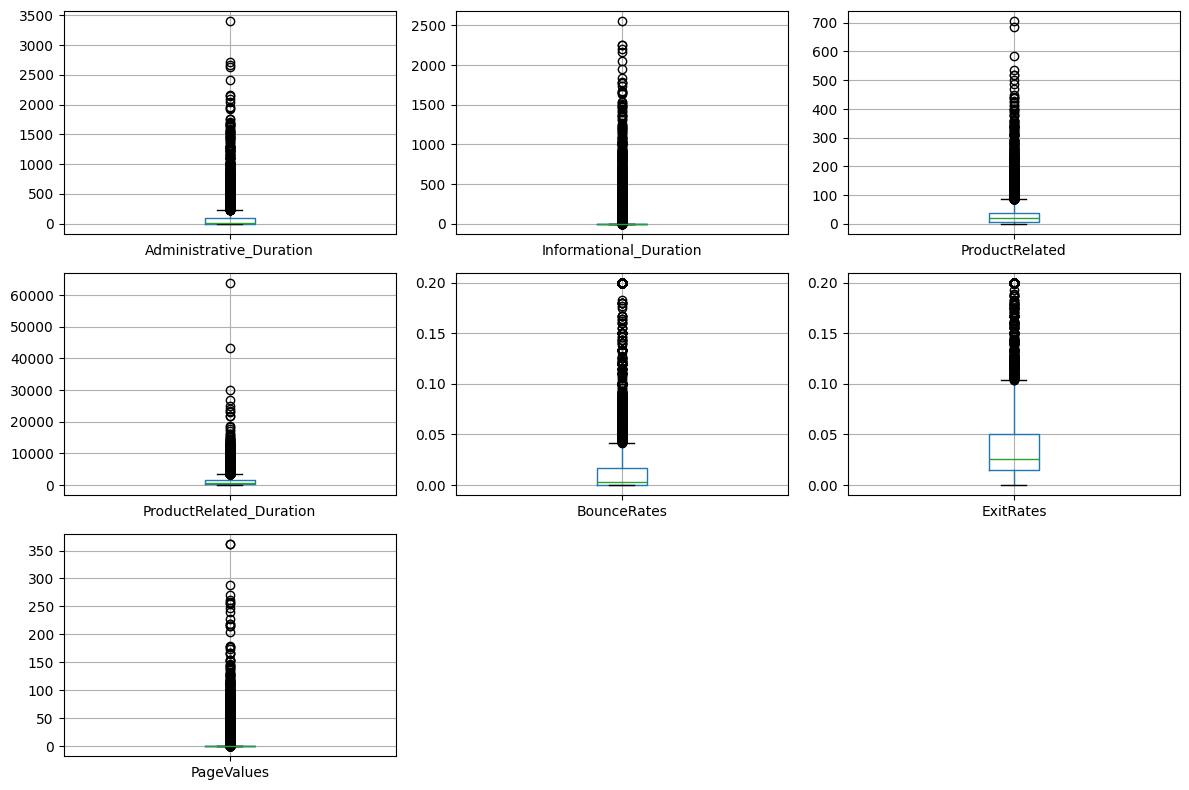

In [13]:
fig = plt.figure(figsize=(12,8))

for i, col in enumerate(continuous):
    plt.subplot(3,3,i+1)
    df.boxplot(col)
    plt.tight_layout()

plt.savefig("botplox1.png")

In [14]:
df[continuous] = np.log1p(1 + df[continuous])

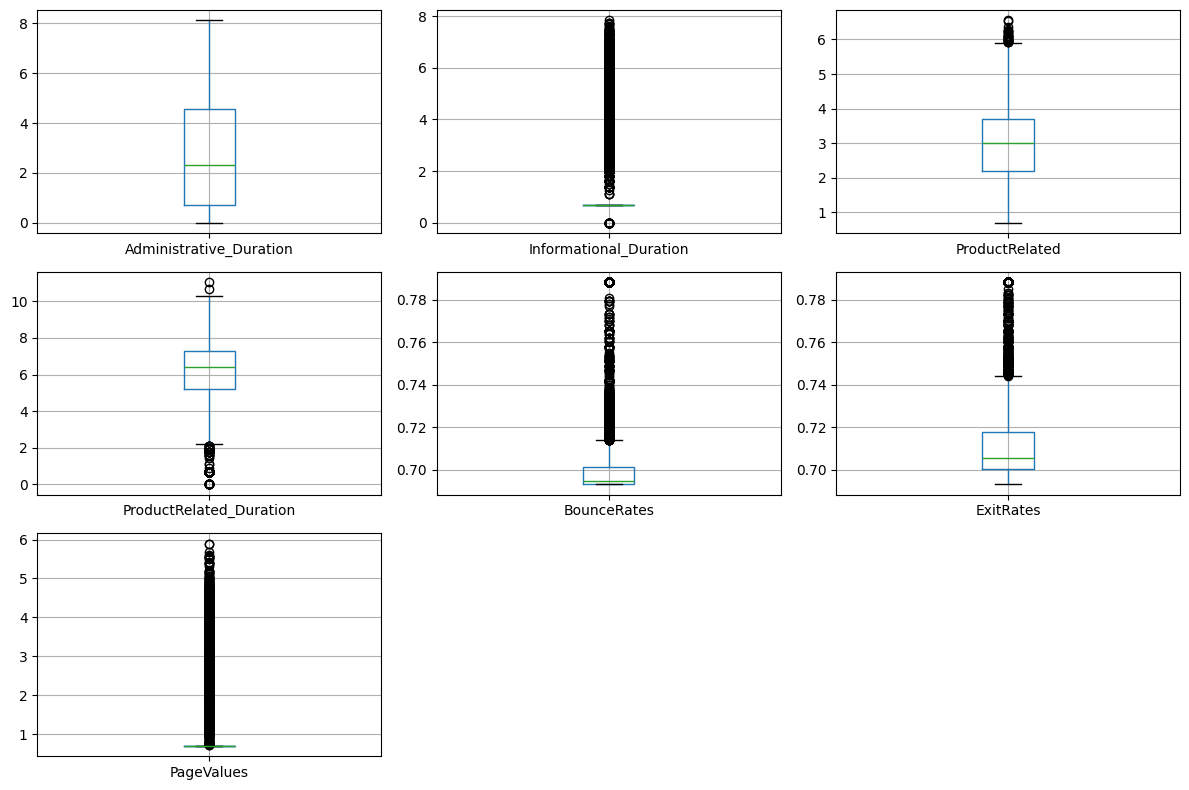

In [15]:
fig = plt.figure(figsize=(12,8))

for i, col in enumerate(continuous):
    plt.subplot(3,3,i+1)
    df.boxplot(col)
    plt.tight_layout()
plt.savefig('boxplot2.png')

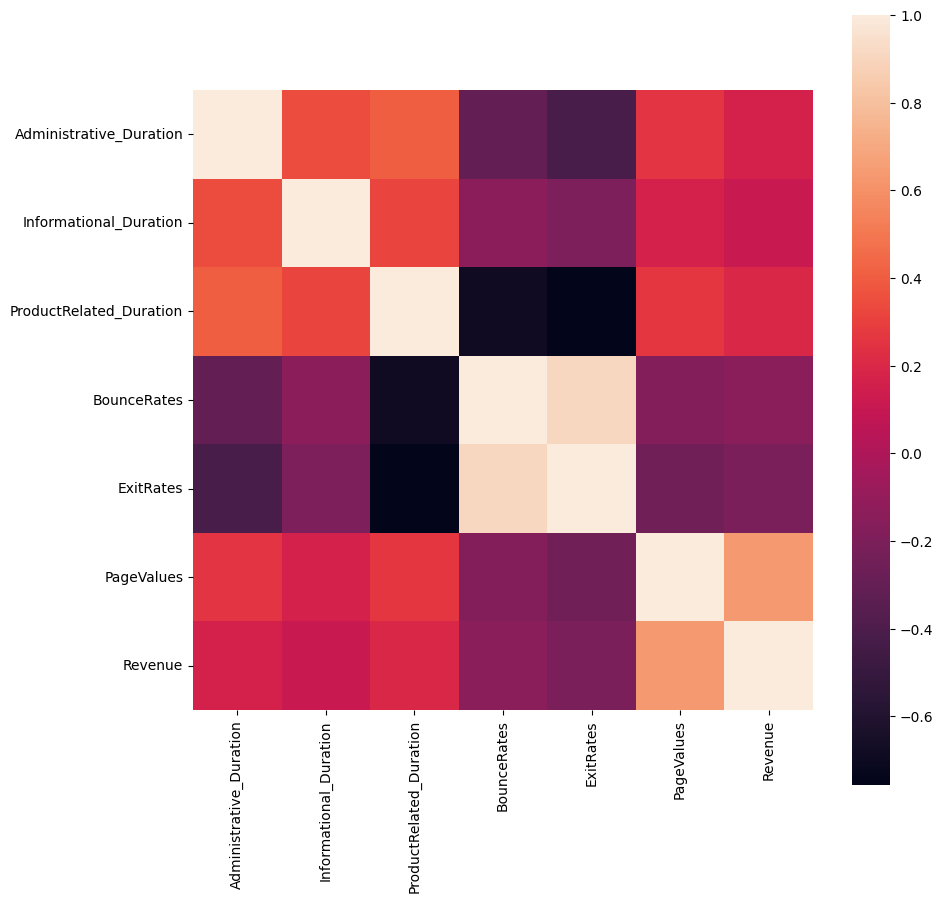

In [16]:
plt.figure(figsize=(10,10))

sns.heatmap(df[['Administrative_Duration',
                 'Informational_Duration',
                 'ProductRelated_Duration',
                 'BounceRates',
                 'ExitRates',
                 'PageValues',
                 'Revenue']].corr(), vmax = 1., square = True)

plt.show()

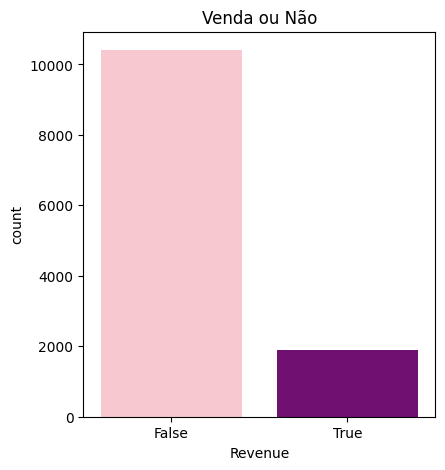

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.title("Venda ou Não")
sns.countplot(x=df['Revenue'],  palette={"False": "pink", "True": "purple"})
plt.show()


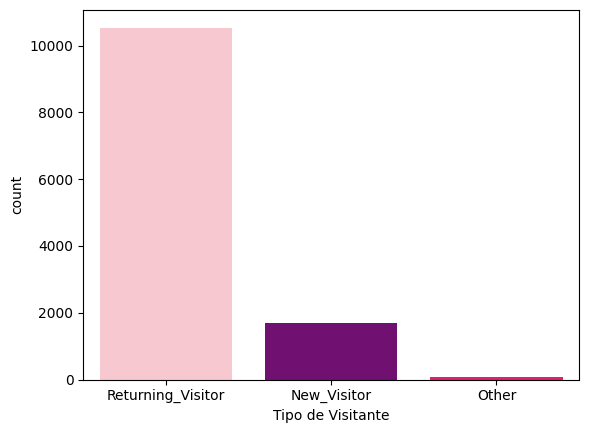

In [18]:
plt.xlabel("Tipo de Visitante")
sns.countplot(x=df['VisitorType'], palette={"Returning_Visitor": "pink", "New_Visitor": "purple", "Other": "#ff006e"})
plt.show()

Revenue X Tipo de Visitante

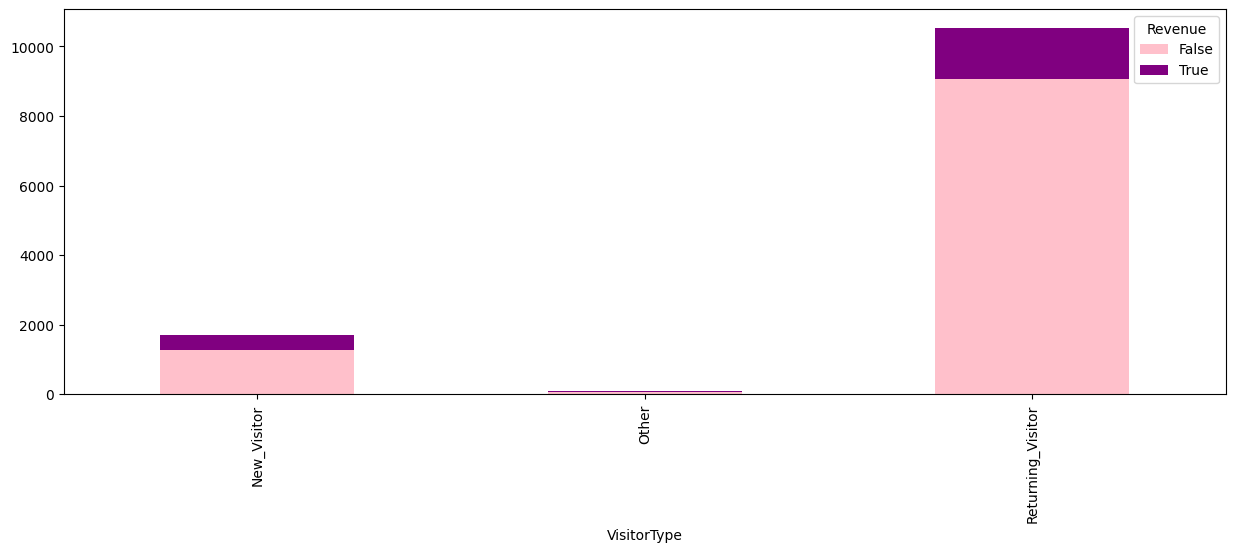

In [19]:
pd.crosstab(df['VisitorType'], df['Revenue']).plot(
    kind = 'bar',
    stacked=True,
    figsize=(15,5),
    color=['pink', 'purple'])
plt.show()

Tipo de Visitante

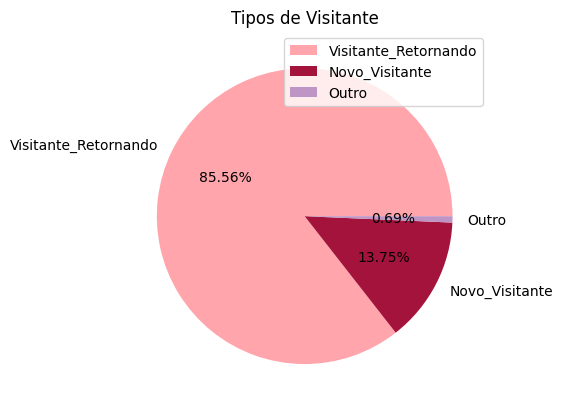

In [20]:
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitante")
plt.pie(df['VisitorType'].value_counts(), labels = labels, autopct="%.2f%%", colors=['#ffa5ab','#a4133c', '#be95c4' ])
plt.legend()
plt.show()

Fim de semana ou não

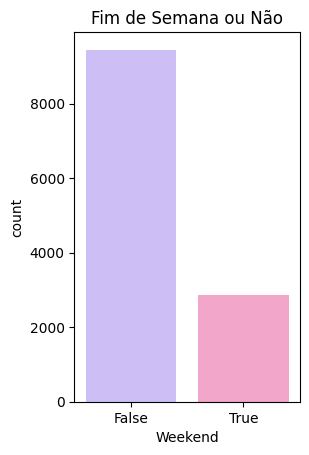

In [21]:
plt.subplot(1,2,1)
plt.title("Fim de Semana ou Não")
sns.countplot(x=df['Weekend'], palette={"False": "#c8b6ff", "True":"#ff99c8"})
plt.show()

Fim de semana X Revenue

<Axes: xlabel='Weekend'>

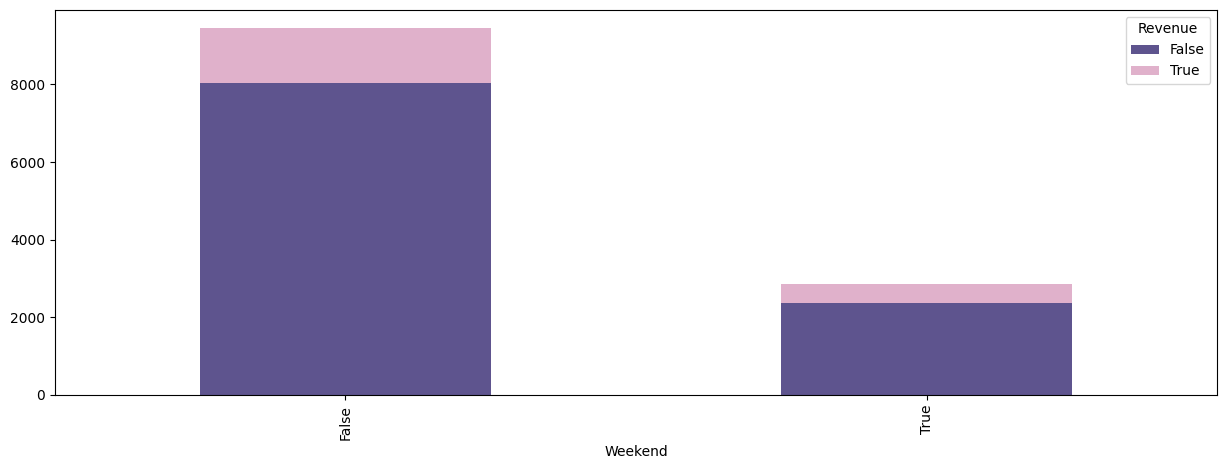

In [22]:
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind='bar',
                                              stacked=True,
                                              figsize=(15,5),
                                              color=['#5e548e', '#e0b1cb'])

Tipos de Sistemas Operacionais

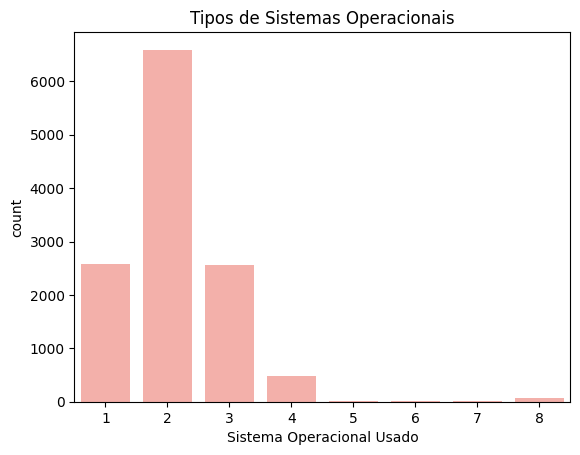

In [23]:
plt.title("Tipos de Sistemas Operacionais")
plt.xlabel("Sistema Operacional Usado")
sns.countplot(x=df['OperatingSystems'], color='#ffa69e')
plt.show()

Sistemas Operacionais X Revenue

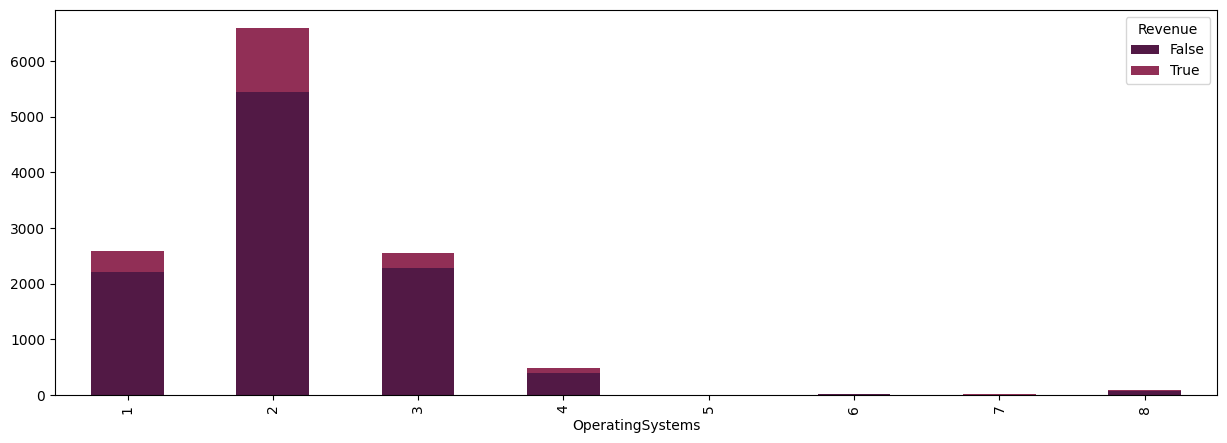

In [24]:
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind='bar',
                                                        stacked=True,
                                                        figsize=(15,5),
                                                        color=['#521945','#912f56'])

plt.show()
                                                        

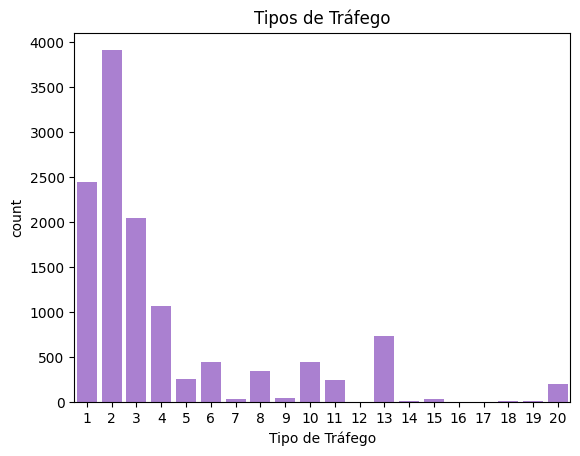

In [25]:
plt.title("Tipos de Tráfego")
plt.xlabel("Tipo de Tráfego")
sns.countplot(x=df['TrafficType'], color='#aa73dd')
plt.show()

Tipo de Tráfego X Revenue

<Axes: xlabel='TrafficType'>

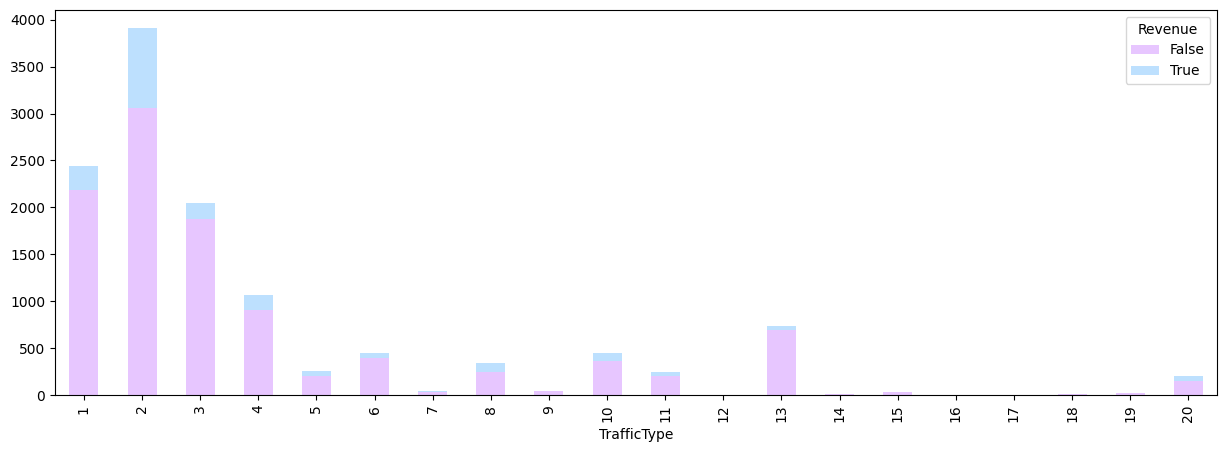

In [26]:
pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind='bar',
                                                   figsize=(15,5),
                                                   stacked=True,
                                                   color=['#e7c6ff', '#bde0fe'])


## Pré-Processamento dos Dados

Aplicando o encoder

In [27]:
lb = LabelEncoder()

df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

df_original.dropna(inplace=True)

In [28]:
df_original.head(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,2,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,2,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,False,False


In [29]:
target_count = df_original.Revenue.value_counts()
target_count

Revenue
False    10408
True      1908
Name: count, dtype: int64

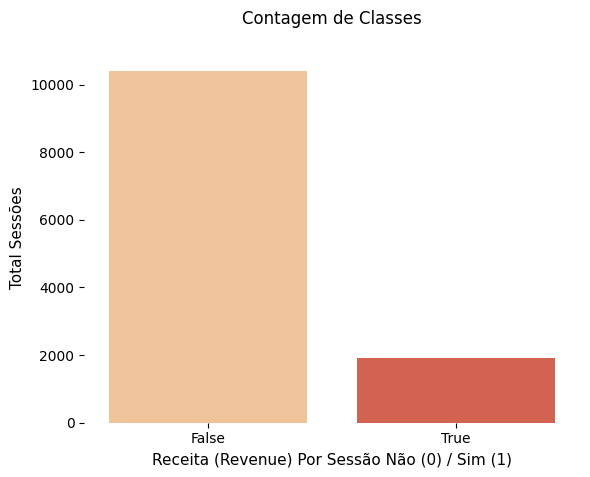

In [30]:
sns.countplot(x='Revenue', data=df_original, palette="OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [31]:
df_original.shape

(12316, 18)

In [32]:
df_original.iloc[:,17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

Balanceando as categorias

In [35]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE 

seed = 100

X = df_original.iloc[:,0:17]
y = df_original.iloc[:, 17]

smote_bal = SMOTE(random_state=seed)

X_res, y_res = smote_bal.fit_resample(X,y)

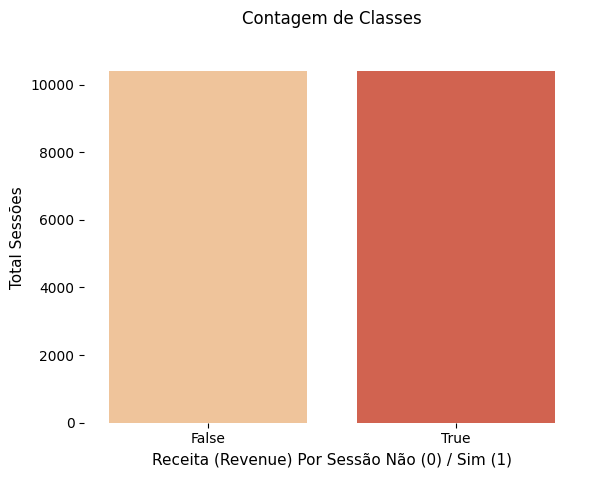

In [36]:
sns.countplot(x=y_res, palette="OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [37]:
df_original.shape

(12316, 18)

In [38]:
X_res.shape

(20816, 17)

In [39]:
y_res.shape

(20816,)

In [40]:
X = X_res.head(1000)
y = y_res.head(1000)

In [41]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelo SVM

Criando o modelo

In [42]:
modelo_v1 = svm.SVC(kernel = 'linear')

Treinamento

In [43]:
start = time.time()
modelo_v1.fit(X_treino, y_treino)
end = time.time()
print('Tempo de treinamento do modelo: ', end - start)

Tempo de treinamento do modelo:  30.270519495010376


Previsões

In [44]:
previsoes_v1 = modelo_v1.predict(X_teste)

In [45]:
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão': '1',
               'Kernel': 'Linear',
               'Precisão': precision_score(previsoes_v1, y_teste),
               'Recall': recall_score(previsoes_v1, y_teste),
               'F1 Score': f1_score(previsoes_v1, y_teste),
               'Acurácia': accuracy_score(previsoes_v1, y_teste),
               'AUC': roc_auc_score(y_teste, previsoes_v1)

}

In [46]:
print("Métricas em teste: \n")
SVM_dict_v1

Métricas em teste: 



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear',
 'Precisão': 0.52,
 'Recall': 0.7647058823529411,
 'F1 Score': 0.6190476190476191,
 'Acurácia': 0.9466666666666667,
 'AUC': np.float64(0.7527272727272728)}

# Padronizando os dados

In [47]:
sc = StandardScaler()
X_treinos_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

In [48]:
X_treinos_scaled

array([[-0.59034343, -0.40561073, -0.31756214, ..., -0.75751167,
         0.33597259, -0.54433105],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259,  1.83711731],
       [ 0.07887179, -0.33356238, -0.31756214, ..., -0.75751167,
         0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
        -2.97643326, -0.54433105],
       [ 0.07887179, -0.16326629, -0.31756214, ..., -0.41048407,
        -2.97643326,  1.83711731],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105]], shape=(700, 17))

In [49]:
X_teste_scaled

array([[ 0.4134794 , -0.02571945, -0.31756214, ..., -0.06345648,
         0.33597259, -0.54433105],
       [-0.25573582, -0.26151404, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105],
       [ 1.08269462,  1.52462998,  4.89244178, ..., -0.75751167,
         0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105],
       [-0.25573582, -0.41216058, -0.31756214, ...,  0.63059872,
         0.33597259,  1.83711731],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.75751167,
         0.33597259,  1.83711731]], shape=(300, 17))

In [50]:
modelo_v2 = svm.SVC(kernel='linear')

In [51]:
start = time.time()
modelo_v2.fit(X_treinos_scaled, y_treino)
end = time.time()
print("Tempo de treinamento do modelo: ", end - start)

Tempo de treinamento do modelo:  0.010601043701171875


In [52]:
previsoes_v2 = modelo_v2.predict(X_teste_scaled)

In [53]:
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão': '2',
               'Kernel': 'Linear com Dados Padronizados',
               'Precisão': precision_score(previsoes_v2, y_teste),
               'Recall': recall_score(previsoes_v2, y_teste),
               'F1 Score': f1_score(previsoes_v2, y_teste),
               'Acurácia': accuracy_score(previsoes_v2, y_teste),
               'AUC': roc_auc_score(y_teste, previsoes_v2)

}

In [54]:
print("Métricas em teste: \n")
SVM_dict_v2

Métricas em teste: 



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear com Dados Padronizados',
 'Precisão': 0.48,
 'Recall': 0.8571428571428571,
 'F1 Score': 0.6153846153846154,
 'Acurácia': 0.95,
 'AUC': np.float64(0.7363636363636362)}

# Otimização de Hiperparâmetros

In [55]:
modelo_v3 = svm.SVC(kernel='rbf')

C_range = np.array([50,100,200])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

start = time.time()
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3)

modelo_v3_grid_search_rbf.fit(X_treinos_scaled, y_treino)
end = time.time()
print('Tempo de treinamento do modelo com Grid Search: ', end - start)

print(f'Acurácia em Treinamento: {modelo_v3_grid_search_rbf.best_score_ : .2%}')
print("")
print(f'Hiperparâmetros Ideais: {modelo_v3_grid_search_rbf.best_params_}')



Tempo de treinamento do modelo com Grid Search:  0.1059410572052002
Acurácia em Treinamento:  94.86%

Hiperparâmetros Ideais: {'C': np.int64(50), 'gamma': np.float64(0.003)}


In [56]:
previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_teste_scaled)

In [57]:
SVM_dict_v3 = {'Modelo':'SVM',
               'Versão': '3',
               'Kernel': 'Linear com Hiperparâmetros',
               'Precisão': precision_score(previsoes_v3, y_teste),
               'Recall': recall_score(previsoes_v3, y_teste),
               'F1 Score': f1_score(previsoes_v3, y_teste),
               'Acurácia': accuracy_score(previsoes_v3, y_teste),
               'AUC': roc_auc_score(y_teste, previsoes_v3)

}

In [58]:
print("Métricas em teste: \n")
SVM_dict_v3

Métricas em teste: 



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'Linear com Hiperparâmetros',
 'Precisão': 0.52,
 'Recall': 0.8666666666666667,
 'F1 Score': 0.65,
 'Acurácia': 0.9533333333333334,
 'AUC': np.float64(0.7563636363636363)}

In [59]:
modelo_v4 = svm.SVC(kernel='poly')

r_range = np.array([0.5,1])
gamma_range = np.array([0.001, 0.01])
d_range = np.array([2,3,4])

param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0= r_range)

start = time.time()
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv=3)

modelo_v4_grid_search_poly.fit(X_treinos_scaled, y_treino)
end = time.time()

print('Tempo de treinamento do modelo com Grid Search: ', end - start)

print(f'Acurácia em Treinamento: {modelo_v4_grid_search_poly.best_score_ : .2%}')
print("")
print(f'Hiperparâmetros Ideais: {modelo_v4_grid_search_poly.best_params_}')


Tempo de treinamento do modelo com Grid Search:  0.0899205207824707
Acurácia em Treinamento:  94.86%

Hiperparâmetros Ideais: {'coef0': np.float64(1.0), 'degree': np.int64(3), 'gamma': np.float64(0.01)}


In [60]:
previsoes_v4 = modelo_v4_grid_search_poly.predict(X_teste_scaled)

In [61]:
SVM_dict_v4 = {'Modelo':'SVM',
               'Versão': '4',
               'Kernel': 'Linear com Hiperparâmetros',
               'Precisão': precision_score(previsoes_v4, y_teste),
               'Recall': recall_score(previsoes_v4, y_teste),
               'F1 Score': f1_score(previsoes_v4, y_teste),
               'Acurácia': accuracy_score(previsoes_v4, y_teste),
               'AUC': roc_auc_score(y_teste, previsoes_v4)

}

In [62]:
print("Métricas em teste: \n")
SVM_dict_v4

Métricas em teste: 



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Linear com Hiperparâmetros',
 'Precisão': 0.4,
 'Recall': 0.7692307692307693,
 'F1 Score': 0.5263157894736842,
 'Acurácia': 0.94,
 'AUC': np.float64(0.6945454545454546)}

In [63]:
resumo = pd.DataFrame({'SVM_Modelo_1': pd.Series(SVM_dict_v1),
                       'SVM_Modelo_2': pd.Series(SVM_dict_v2),
                       'SVM_Modelo_3': pd.Series(SVM_dict_v3),
                       'SVM_Modelo_4': pd.Series(SVM_dict_v4)})

In [64]:
resumo

,SVM_Modelo_1,SVM_Modelo_2,SVM_Modelo_3,SVM_Modelo_4
Modelo,SVM,SVM,SVM,SVM
Versão,1,2,3,4
Kernel,Linear,Linear com Dados Padronizados,Linear com Hiperparâmetros,Linear com Hiperparâmetros
Precisão,0.52,0.48,0.52,0.4
Recall,0.764706,0.857143,0.866667,0.769231
F1 Score,0.619048,0.615385,0.65,0.526316
Acurácia,0.946667,0.95,0.953333,0.94
AUC,0.752727,0.736364,0.756364,0.694545
